# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label) =  mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot, validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.2698 - acc: 0.9222 - val_loss: 0.1329 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.1080 - acc: 0.9680 - val_loss: 0.1040 - val_acc: 0.9690
Epoch 3/10
48000/48000 [==============================] - 6s 119us/step - loss: 0.0713 - acc: 0.9786 - val_loss: 0.0942 - val_acc: 0.9720
Epoch 4/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.0511 - acc: 0.9837 - val_loss: 0.0808 - val_acc: 0.9757
Epoch 5/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0807 - val_acc: 0.9755
Epoch 6/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0790 - val_acc: 0.9775
Epoch 7/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.0875 - 

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

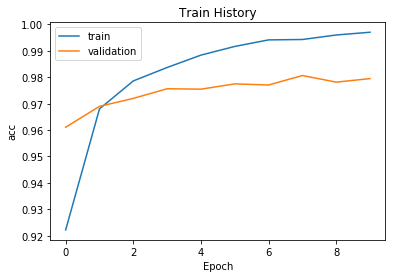

In [12]:
show_train_history(train_history,'acc','val_acc')

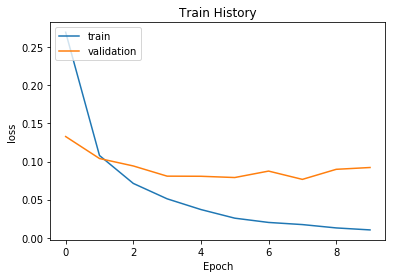

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 50us/step

accuracy= 0.9796


In [15]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, input_dim=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot, validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.4259 - acc: 0.8726 - val_loss: 0.2004 - val_acc: 0.9435
Epoch 2/10
48000/48000 [==============================] - 7s 135us/step - loss: 0.1700 - acc: 0.9506 - val_loss: 0.1353 - val_acc: 0.9611
Epoch 3/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.1168 - acc: 0.9649 - val_loss: 0.1180 - val_acc: 0.9638
Epoch 4/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0876 - acc: 0.9733 - val_loss: 0.0996 - val_acc: 0.9711
Epoch 5/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.0663 - acc: 0.9804 - val_loss: 0.0931 - val_acc: 0.9737
Epoch 6/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.1057 - val_acc: 0.9704
Epoch 7/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.0407 - acc: 0.9877 - val_loss: 0.0955 - 

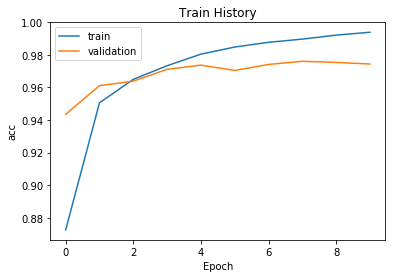

In [16]:
show_train_history(train_history,'acc','val_acc')

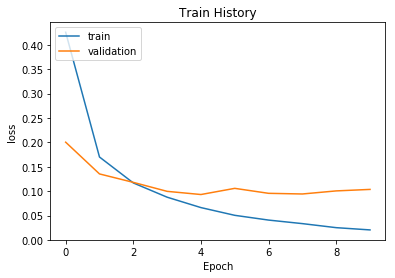

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9745


In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 203,640
Trainable params: 203,640
Non-trainable params: 0
_________________________________________________________________
None
